In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data

In [2]:
try:    df = pd.read_csv("data/wine.csv", sep=";")
except: df = pd.read_csv("../data/wine.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,7.4,0.70,0.00,1.9,E,11.0,34.0,0.9978,3.51,medium,9.4,red,5
1,7.8,0.88,0.00,2.6,C,25.0,67.0,0.9968,3.2,high,9.8,red,5
2,7.8,0.76,0.04,2.3,C,15.0,54.0,0.9970,3.26,high,9.8,?,5
3,11.2,0.28,0.56,1.9,E,17.0,60.0,0.9980,3.16,medium,9.8,red,6
4,7.4,0.70,0.00,1.9,E,11.0,34.0,0.9978,3.51,medium,9.4,red,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null object
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null object
sulphates               6497 non-null object
alcohol                 6497 non-null float64
color                   6497 non-null object
quality                 6497 non-null int64
dtypes: float64(8), int64(1), object(4)
memory usage: 659.9+ KB


In [4]:
df = df.replace(["?"], np.nan)
df["pH"] = df["pH"].astype(np.float64)  # convert pH column to numeric
df.info()

X = df.drop("quality", axis=1)
y = df[["quality"]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null object
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      5855 non-null float64
sulphates               6497 non-null object
alcohol                 6497 non-null float64
color                   5787 non-null object
quality                 6497 non-null int64
dtypes: float64(9), int64(1), object(3)
memory usage: 659.9+ KB


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Missing values imputation

In [6]:
# copy the datasets
X_train = X_train.copy()
X_test  = X_test .copy()

# make a third category for color
X_train["color"] = X_train["color"].fillna("unknown")
X_test ["color"] = X_test ["color"].fillna("unknown")

# use mean value of the training set for pH
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
imp.fit(X_train[["pH"]])
X_train["pH"] = imp.transform(X_train[["pH"]])
X_test ["pH"] = imp.transform(X_test [["pH"]])

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872 entries, 3731 to 2732
Data columns (total 12 columns):
fixed acidity           4872 non-null float64
volatile acidity        4872 non-null float64
citric acid             4872 non-null float64
residual sugar          4872 non-null float64
chlorides               4872 non-null object
free sulfur dioxide     4872 non-null float64
total sulfur dioxide    4872 non-null float64
density                 4872 non-null float64
pH                      4872 non-null float64
sulphates               4872 non-null object
alcohol                 4872 non-null float64
color                   4872 non-null object
dtypes: float64(9), object(3)
memory usage: 494.8+ KB


# Column transformation:
- Convert categorical/text column into integers (oneHotEncoded)
- Scale numerical columns

In [7]:
categories = X.dtypes == object
categories

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates                True
alcohol                 False
color                    True
dtype: bool

In [8]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


tf = make_column_transformer(
    (OneHotEncoder(sparse=False),  categories), 
    (StandardScaler(), ~categories),     
    remainder="passthrough")
tf.fit(X_train)
X_train = tf.transform(X_train)
X_test  = tf.transform(X_test)

# now, X_train, X_test are not Pandas dataframes anymore, but are numpy arrays
print("type=", type(X_train))
X_train[:5]

type= <class 'numpy.ndarray'>


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        , -0.08802117, -0.72820076,  0.00517689,  2.48517455,
         1.02972262,  0.744625  ,  1.75251273,  1.01481219, -0.75281497],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        , -0.78538358, -1.09072305,  0.07390119, -0.91964663,
        -0.53015235, -0.59665306, -1.25026338,  0.68577368,  0.34073703],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        , -0.39796002, -0.60736   , -0.13227171, -0.32703535,
         4.14947258,  1.1152413 , -0.94657352, -1.15684202,  0.67721458],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  

# Gradient boosting 

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
regr = GradientBoostingRegressor()
regr.fit(X_train, y_train)  
print("train", regr.score(X_train, y_train)  )
print("test ", regr.score(X_test, y_test)  )

/home/gilles/anaconda3/envs/blackbelt/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train 0.46460011085651653
test  0.38604260047849914


In [10]:
regr.feature_importances_  

array([1.80617010e-03, 5.56986050e-03, 2.64265583e-02, 0.00000000e+00,
       2.98812107e-03, 1.26780920e-02, 2.79873705e-04, 2.98108525e-04,
       5.04324827e-05, 0.00000000e+00, 7.08447261e-03, 1.97083277e-02,
       1.70604358e-01, 4.18473106e-02, 4.59745063e-02, 9.66244176e-02,
       4.29915842e-02, 3.16331594e-02, 2.58591128e-02, 4.67575534e-01])

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'learning_rate' : [0.025, 0.05, 0.1, 0.15, 0.2]}

np.set_printoptions(suppress=True)
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'learning_rate': [0.025, 0.05, 0.1, 0.15, 0.2]}


In [35]:
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, verbose=3, cv=5, return_train_score=True)

In [36]:
grid_search.fit(X_train, y_train.values.flatten())

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] learning_rate=0.025, n_estimators=100 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.025, n_estimators=100, score=(train=0.366, test=0.285), total=   0.3s
[CV] learning_rate=0.025, n_estimators=100 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  learning_rate=0.025, n_estimators=100, score=(train=0.350, test=0.328), total=   0.4s
[CV] learning_rate=0.025, n_estimators=100 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  learning_rate=0.025, n_estimators=100, score=(train=0.356, test=0.322), total=   0.3s
[CV] learning_rate=0.025, n_estimators=100 ...........................
[CV]  learning_rate=0.025, n_estimators=100, score=(train=0.351, test=0.335), total=   0.4s
[CV] learning_rate=0.025, n_estimators=100 ...........................
[CV]  learning_rate=0.025, n_estimators=100, score=(train=0.356, test=0.329), total=   0.4s
[CV] learning_rate=0.025, n_estimators=200 ...........................
[CV]  learning_rate=0.025, n_estimators=200, score=(train=0.427, test=0.321), total=   0.6s
[CV] learning_rate=0.025, n_estimators=200 ...........................
[CV]  learning_rate=0.025, n_estimators=200, score=(train=0.409, test=0.370), total=   0.6s
[CV] learning_rate=0.025, n_estimators=200 ...........................
[CV]  learning_rate=0.025, n_estimators=200, score=(train=0.412, test=0.365), total=   0.6s
[CV] learning_rate=0.025, n_estimators=200 ...........................
[CV]  learning_rate=0.

[CV]  learning_rate=0.1, n_estimators=100, score=(train=0.475, test=0.400), total=   0.3s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV]  learning_rate=0.1, n_estimators=100, score=(train=0.476, test=0.390), total=   0.3s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV]  learning_rate=0.1, n_estimators=200, score=(train=0.559, test=0.353), total=   0.5s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV]  learning_rate=0.1, n_estimators=200, score=(train=0.543, test=0.416), total=   0.5s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV]  learning_rate=0.1, n_estimators=200, score=(train=0.544, test=0.394), total=   0.5s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV]  learning_rate=0.1, n_estimators=200, score=(train=0.543, test=0.409), total=   0.5s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV]  learning_rate=0.1, n_estimat

[CV]  learning_rate=0.2, n_estimators=100, score=(train=0.539, test=0.391), total=   0.2s
[CV] learning_rate=0.2, n_estimators=200 .............................
[CV]  learning_rate=0.2, n_estimators=200, score=(train=0.651, test=0.355), total=   0.5s
[CV] learning_rate=0.2, n_estimators=200 .............................
[CV]  learning_rate=0.2, n_estimators=200, score=(train=0.641, test=0.413), total=   0.5s
[CV] learning_rate=0.2, n_estimators=200 .............................
[CV]  learning_rate=0.2, n_estimators=200, score=(train=0.640, test=0.398), total=   0.5s
[CV] learning_rate=0.2, n_estimators=200 .............................
[CV]  learning_rate=0.2, n_estimators=200, score=(train=0.636, test=0.414), total=   0.5s
[CV] learning_rate=0.2, n_estimators=200 .............................
[CV]  learning_rate=0.2, n_estimators=200, score=(train=0.641, test=0.399), total=   0.5s
[CV] learning_rate=0.2, n_estimators=300 .............................
[CV]  learning_rate=0.2, n_estimat

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [37]:
grid_search.best_params_

{'learning_rate': 0.15, 'n_estimators': 300}

In [38]:
grid_search.best_score_

0.4066236752115305

In [39]:
scores = pd.DataFrame(grid_search.cv_results_)

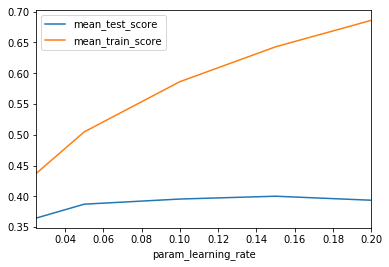

In [40]:
scores.groupby("param_learning_rate").mean()[["mean_test_score", "mean_train_score"]].plot()

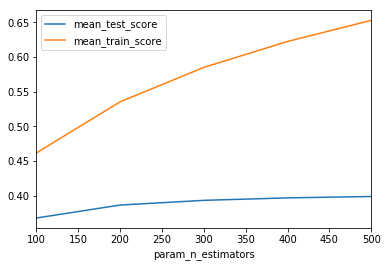

In [41]:
scores.groupby("param_n_estimators").mean()[["mean_test_score", "mean_train_score"]].plot()

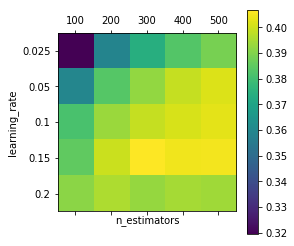

In [42]:
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(5,5)

plt.matshow(scores)
plt.xlabel('n_estimators')
plt.ylabel('learning_rate')
plt.colorbar()
plt.xticks(np.arange(5), param_grid['n_estimators'])
plt.yticks(np.arange(5), param_grid['learning_rate'])
plt.show()